# Practical Project  - Arthur Rodrigues S. Quadros & João Pedro Torres & Sarah Luiza S. Magalhães

**University:** Pontifical Catholic University of Minas Gerais

**Course:** Computer Science

**Subject:** Performance Modeling and Evaluation

**Professor:** Diego Silva Caldeira Rocha

**Theme:** Utilizing k-means and creating our own heuristic for it with a dataset containing the longitude and the latitute for every brazilian city. The objective of this project is to clusterize all cities of Minas Gerais for a number of landfills in the state. Our heuristic is explained in more details in the article.

The original dataset is available [here](https://github.com/kelvins/Municipios-Brasileiros).

To run this notebook, either change the way to get the dataset or configure the file_path variable to the path in your google drive in which contains the source file.

# Imports and basic configurations

In [ ]:
import pandas as pd
import numpy as np

from google.colab import drive

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import random

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = "drive/MyDrive/path_to_the_file"

In [ ]:
raw_df = pd.read_csv(f"{file_path}municipios.csv", sep=",")
raw_df.head(5)

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf,siafi_id,ddd,fuso_horario
0,5200050,Abadia de Goiás,-16.75730,-49.4412,0,52,1050,62,America/Sao_Paulo
1,3100104,Abadia dos Dourados,-18.48310,-47.3916,0,31,4001,34,America/Sao_Paulo
2,5200100,Abadiânia,-16.19700,-48.7057,0,52,9201,62,America/Sao_Paulo
3,3100203,Abaeté,-19.15510,-45.4444,0,31,4003,37,America/Sao_Paulo
4,1500107,Abaetetuba,-1.72183,-48.8788,0,15,401,91,America/Sao_Paulo


# Data handling

In [ ]:
df = raw_df.copy()

print("Total Length of DataFrame:", len(df))

df.head(5)

In [ ]:
df = df.loc[df["codigo_uf"] == 31] # get only Minas Gerais data
# df.index = df.codigo_ibge # the Clustering class uses position of rows, changing index will raise an error

cols_to_drop = [
    "capital",
    "nome",
    "siafi_id",
    "ddd",
    "fuso_horario",
    "codigo_ibge",
    "codigo_uf"
]

df = df.drop(cols_to_drop, axis=1) # keep only longitude and latitude for clustering

df.head(5)

In [ ]:
print("Total Length of DataFrame after filter:", len(df)) # 853 cities in Minas Gerais

# First Implementation

## Basic tests and understanding of the algorithm

Simple tests with SSE being used as quality metric for all possibities of n_clusters from 2 to 10.

In [ ]:
for i in (2, 3, 4, 5, 6, 7, 8, 9, 10):
  kmeans = KMeans(n_clusters=i, random_state=5)
  kmeans.fit(df)
  print(f"i = {i}", kmeans.score(df)) # the score returns (- (SSE for all clusters))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


i = 2 -3603.563315796916


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


i = 3 -2297.000370942985
i = 4 -1694.1399719943752
i = 5 -1338.2559167884629
i = 6 -1099.1382188674886
i = 7 -871.6621045614588
i = 8 -772.9138544819425


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

i = 9 -693.2429844031858
i = 10 -628.1475959553728


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans.score(df)

-628.1475959553728

In [ ]:
kmeans.cluster_centers_ # this gets all the centers calculated after .fit()

array([[-16.23001765, -44.64003088],
       [-21.2800304 , -43.4848288 ],
       [-18.54753939, -42.11174242],
       [-20.75245733, -46.030488  ],
       [-19.36389697, -49.12197879],
       [-20.23056346, -42.37181923],
       [-16.32478228, -41.77320886],
       [-18.89949423, -46.59057885],
       [-22.06378131, -45.57179065],
       [-19.57499009, -44.14306396]])

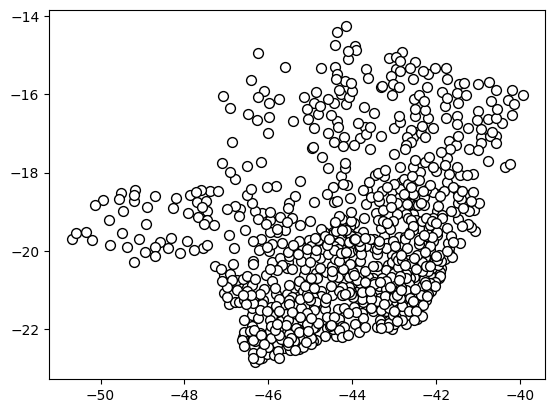

In [ ]:
# longitude -> distance to prime meridian (Greenwich) = X
# latitude -> distance to equator line = Y

plt.scatter(
   df["longitude"], df["latitude"],
   c='white', marker='o',
   edgecolor='black', s=50
)

# plt.show() clears everything plotted before
# after this plt.show(), you can call multiple plt.scatter or any other type of graph
# and they will overlap, creating more complex graphs

plt.show() # plot simple graph

## Definitive tests

Sum of Squared Error (SSE): [96.62792274 50.58804164 60.40086251 71.94652461 50.24568989 60.96837515
 43.15175595 63.58237093 73.61286607 55.35638696]
J: 626.4807964427062

Y is the cluster for all 853 cities.

Y type: <class 'numpy.ndarray'>
Y length: 853
Y dimentions: (853,)



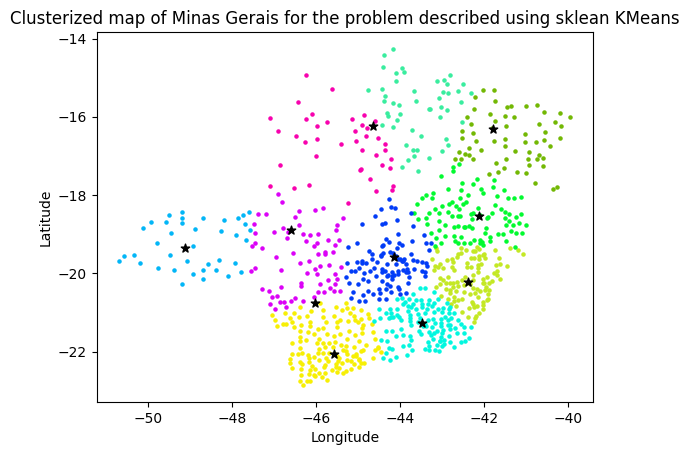

In [ ]:
# default parameters for heuristics comparison with Sklearn KMeans

n_clusters = 10
n_init = 50
max_iter = 5000
tol = 1e-5
random_state = 5
init="random"

X = np.ndarray(shape=(len(df), 2)) # ndarray to get clusterwise SSE

for i in range(len(df.index)):
  X[i][0] = df["latitude"].values[i]
  X[i][1] = df["longitude"].values[i]

definitive_model = KMeans(
    n_clusters=n_clusters, init=init,
    n_init=n_init, max_iter=max_iter,
    tol=tol, random_state=random_state,
).fit(X)


cluster_centers = [X[definitive_model.labels_ == i].mean(axis=0) for i in range(n_clusters)] # get all centers

clusterwise_sse = ([0] * n_clusters) # start list with len(n_clusters) with all zeros
for point, label in zip(X, definitive_model.labels_):
    clusterwise_sse[label] += np.square(point - cluster_centers[label]).sum() # calculate clusterwise SSE

# get total SSE

j = 0
for i in clusterwise_sse:
  j += i

# print mathematical metrics

print("Sum of Squared Error (SSE):", np.array(clusterwise_sse))
print("J:", j)
print()

# get clusters for each city

y = definitive_model.predict(X)

print("Y is the cluster for all 853 cities.\n")
print("Y type:", type(y))
print("Y length:", len(y))
print("Y dimentions:", y.shape)
print()

# plot clusterized map

color_by_cluster = {
    0: "#f7ef05", 1: "#c4e825",
    2: "#73b804", 3: "#02fa30",
    4: "#39ed9f", 5: "#02f7df",
    6: "#02b6f7", 7: "#023cf7",
    8: "#db02f7", 9: "#f702ae",
}
clusters_symbol = "."

center_color, center_symbol = "#000000", "*" # black star

plt.title("Clusterized map of Minas Gerais for the problem described using sklean KMeans")

plt.xlabel("Longitude")
plt.ylabel("Latitude")

for i in range(n_clusters):
  plt.scatter(
    df.iloc[y == i, :]["longitude"], # X
    df.iloc[y == i, :]["latitude"],  # Y
    c=color_by_cluster[i], marker=clusters_symbol,
    edgecolor=color_by_cluster[i], s=20
  )

for i in range(n_clusters):
  plt.scatter(
    kmeans.cluster_centers_[i][1], # X
    kmeans.cluster_centers_[i][0], # Y
    c=center_color, marker=center_symbol,
    edgecolor=center_color, s=40
  )

plt.show()

# Second Implementation

Better explanaition in the article

Heuristics based mainly on Manhattan Distance.

It calculates the initial centers getting them randomly n_init times, after that, it is calculated an affinity matrix for each of these iterations with Manhattan distance as calculation method. And the matrix with the highest average distance between all centers is chosen to be the starting centers. The idea for this is that the bigger the area between centers, the more area is covered.

There is also the idea of getting an iteration with all distances equidistant X with X being close to the maximum Manhattan Distance between two random points in the dataset divided by the number of clusters.

The points for each cluster are calculated using Manhattan Distance and it iterates max_iter times unless it converges.

For the converge, it is also a custom heuristic. The tolerance is used to calculate whether the change the new iteration have in comparison to the last iteration is enough to be considered significant or not. If it is not considered significant, it stops even without reaching max_iter. For it to be considered significant, the new iteration values (Nv) needs to have at least 25% of its points changing more than the old value (Ov) \* tol ((Ov - Ov \* tol) <= Nv <= (Ov + Ov \* tol)).

## Tests

We run the standard sklearn KMeans with specific hiper-parameters and compare the results (visual and mathematical) with our own customized heuristic with the same hiper-parameters.

## All implementations for the heuristic

In [ ]:
class Clustering:
  def __init__(self, n_clusters: int = 2, n_init: int = 10, max_iter: int = 300,
               tol=1e-4, random_state: int = 5) -> None:
    self.__n_clusters = n_clusters
    self.__n_init = n_init
    self.__max_iter = max_iter
    self.__tol = tol
    self.__random_state = random_state

    self.cluster_centers_ = None
    self.metrics = {"J": -1.0, "Jk": np.ndarray(shape=(self.__n_clusters))}

  def fit_predict(self, X) -> np.ndarray:
    x, y = X.columns[0], X.columns[1]
    
    res = None
    
    size = len(X[x])
    if size != len(X[y]):
      raise IndexError("X and Y must have the same length.")

    centers = self.__get_centers(X, x, y)
    self.cluster_centers_ = centers.copy()

    iteration_answers = np.ndarray(shape=(self.__n_clusters, size))
    last_iteration = None

    for _ in range(self.__max_iter):
        
      for i, index in enumerate(X.index):
        for j in range(len(centers)):
          iteration_answers[j][i] = Clustering.__manhattan_distance(
              x=centers[j], # center point
              y=(X[x].values[i], X[y].values[i]) # iteration point
          )
      clusters = Clustering.__get_clusters(iteration_answers)
      res = clusters

      if self.__tol != -1.0:
        if last_iteration is not None and self.__did_converge(iteration_answers, last_iteration):
          break
      
      # recalculate centers

      centers = np.ndarray(shape=(self.__n_clusters, 2))
      for i in range(self.__n_clusters):
        mean_x = mean_y = 0.0
        indexes = np.where(clusters == i)

        for pos in indexes[0]:
          mean_x += X[x].values[pos]
          mean_y += X[y].values[pos]
        
        centers[i][0] = mean_x / len(indexes[0])
        centers[i][1] = mean_y / len(indexes[0])

      self.cluster_centers_ = centers.copy()

      # define last_iteration copy for testing convergence

      last_iteration = iteration_answers.copy()

    # calculate SSE

    self.metrics["Jk"].fill(0.0)

    for i in range(self.__n_clusters):
      indexes = np.where(res == i)
      
      point = np.ndarray(shape=(2,))
      for index in indexes[0]:
        point[0] = X[x].values[index]
        point[1] = X[y].values[index]

        self.metrics["Jk"][i] += np.square(point - self.cluster_centers_[i]).sum()

    self.metrics["J"] = self.metrics["Jk"].sum()
    return res
  
  @staticmethod
  def __get_biggest(d: dict) -> tuple:
    biggest = 0
    for c, key in enumerate(d):
      if d[key] > d[biggest]:
        biggest = c
    return (biggest, d[biggest])

  @staticmethod
  def __manhattan_distance(x: (np.ndarray | float),
                           y: (np.ndarray | float)) -> float:
    return abs(x[0] - y[0]) + abs(x[1] - y[1])

  @staticmethod
  def __get_clusters(iteration_answers) -> np.ndarray:
    res = np.ndarray(shape=(len(iteration_answers[0]),), dtype=np.int32)
    for i in range(len(res)):
      smallest = 0
      for j in range(1, len(iteration_answers)):
        if iteration_answers[j][i] < iteration_answers[smallest][i]:
          smallest = j
      res[i] = smallest
    return res

  def __get_centers(self, X, x, y) -> np.ndarray:
    all_centers = np.ndarray(shape=(self.__n_init, self.__n_clusters, 2))
    
    size = len(X[x])

    # get all random centers

    random.seed(self.__random_state)
    for i in range(self.__n_init):

      indexes = random.choices([i for i in range(size)], k=self.__n_clusters)
      for j in range(self.__n_clusters):
        all_centers[i][j][0] = X[x].values[indexes[j]]
        all_centers[i][j][1] = X[y].values[indexes[j]]
    
    # get centers with biggest average distance

    avg_distances = {}
    distances = np.ndarray(shape=(self.__n_clusters, self.__n_clusters))

    for i in range(self.__n_init):
      for j in range(self.__n_clusters):
        for k in range(self.__n_clusters):
          distances[j][k] = Clustering.__manhattan_distance(
              x=all_centers[i][j],
              y=all_centers[i][k]
          )
      
      avg_distances[i] = ((distances.sum() / 2) / self.__n_clusters)
  
    return all_centers[Clustering.__get_biggest(avg_distances)[0]]
  
  
  def __did_converge(self, iteration_answers: np.ndarray, last_iteration: np.ndarray) -> bool:
    """Calculate convergence based on tolerance.
      For tolerance:
      Example:
        Tol = 1e-4
          With the old value being Ov and the new value Nv,
          declare convergence if a given fraction (50% of data) of Nv changed less than
          (more or less) (1e-4 * Ov) in relation to Ov. Nv must be in the interval
          [Ov +- (1e-4 * Ov)]. If convergence is declared, the algorithm
          stops before max_iter.
    """

    res = False

    if iteration_answers.shape != last_iteration.shape:
      raise IndexError("Iteration shapes must be equal.")

    half = int((len(iteration_answers[0]) * self.__n_clusters) * 0.75) + 1
    counter = 0

    for i in range(self.__n_clusters):
      for j in range(len(iteration_answers[0])):
        last = last_iteration[i][j]
        tol = last * self.__tol

        if (last - (last * tol)) <= iteration_answers[i][j] <= (last + (last * tol)):
          counter += 1
          if counter >= half:
            res = True
            break
    
    return res

## Tests

In [ ]:
manhattan_clustering = Clustering(n_clusters=n_clusters, n_init=n_init, max_iter=max_iter, tol=tol, random_state=random_state)
y_manhattan_clustering = manhattan_clustering.fit_predict(df)

------- Both algorithms use the same parameters but with different heuristics. -------




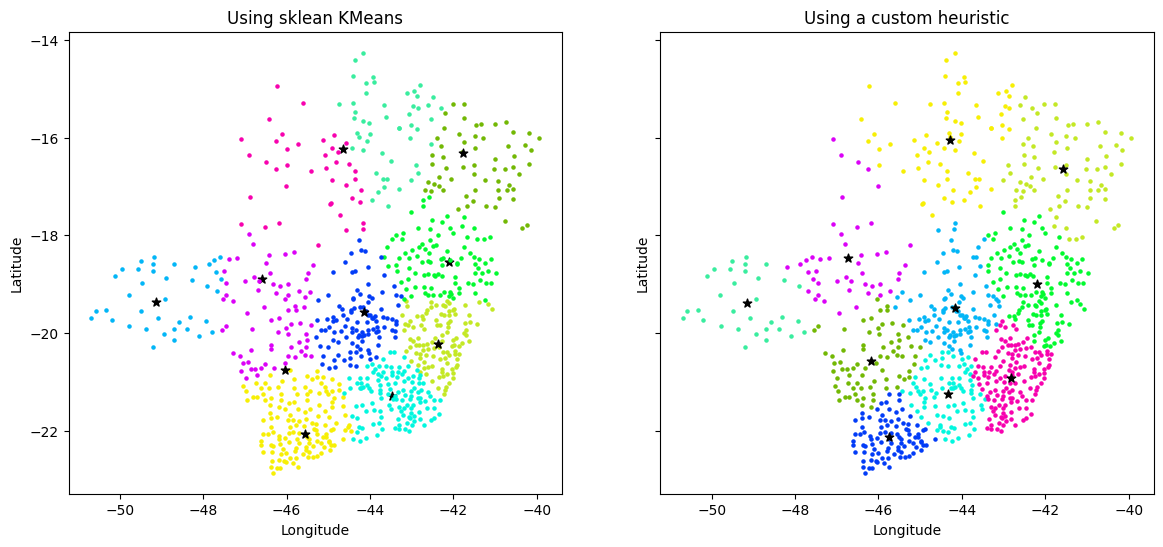



------------ Sklearn metrics ------------


Sum of Squared Error (SSE) by cluster (0 to 10)
[96.62792274 50.58804164 60.40086251 71.94652461 50.24568989 60.96837515
 43.15175595 63.58237093 73.61286607 55.35638696]
J: 626.4807964427062


------------ Custom heuristics metrics ------------


Sum of Squared Error (SSE) by cluster (0 to 10)
[102.42125651  94.80601133  49.46799787 102.17796072  28.79258161
  38.93308022  71.95648094  33.72994958  56.52015777  68.68805802]
J: 647.4935345818417





In [ ]:
print("------- Both algorithms use the same parameters but with different heuristics. -------")
print("\n")
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey='row')
ax1, ax2 = axs

# plot side by side Sklearn implementation and ours
# ax1 = Sklearn results
# ax2 = our result

for i in range(n_clusters):
  ax1.scatter(df.iloc[y == i, :]["longitude"], df.iloc[y == i, :]["latitude"],
              c=color_by_cluster[i], marker=clusters_symbol, edgecolor=color_by_cluster[i], s=20) # all points
  ax1.scatter(kmeans.cluster_centers_[i][1], kmeans.cluster_centers_[i][0],
              c=center_color, marker=center_symbol, edgecolor=center_color, s=40) # center points

  ax2.scatter(df.iloc[y_manhattan_clustering == i, :]["longitude"], df.iloc[y_manhattan_clustering == i, :]["latitude"],
              c=color_by_cluster[i], marker=clusters_symbol, edgecolor=color_by_cluster[i], s=20) # all points
  ax2.scatter(manhattan_clustering.cluster_centers_[i][1], manhattan_clustering.cluster_centers_[i][0],
              c=center_color, marker=center_symbol, edgecolor=center_color, s=40) # center points

plt.title("Clusterized map of Minas Gerais for the problem described")

ax1.set_title("Using sklean KMeans")
ax1.set_xlabel("Longitude")
ax1.set_ylabel("Latitude")

ax2.set_title("Using a custom heuristic")
ax2.set_xlabel("Longitude")
ax2.set_ylabel("Latitude")

plt.show()

# print SSE by cluster for both implementations
# print total SSE for both implementations

print("\n")
print("------------ Sklearn metrics ------------")
print("\n")
print(f"Sum of Squared Error (SSE) by cluster (0 to {n_clusters})\n{np.array(clusterwise_sse)}")
print(f"J: {j}")
print("\n")

print("------------ Custom heuristics metrics ------------")
print("\n")
print(f"Sum of Squared Error (SSE) by cluster (0 to {n_clusters})\n{manhattan_clustering.metrics['Jk']}")
print(f"J: {manhattan_clustering.metrics['J']}")
print("\n\n")

# Sklearn algorithm get better results by aprox. 3.5% in the total SSE
# Our own heuristic get overall a bigger range of SSE by clusters than Sklearn implementation
# with some clusters having closer to 0 errors, meanwhile others with a larger error
# Sklearn algorithm get overall better distributed SSE by clusters